# NAME - GAURAV MAHESHWARI (INTERN AT THE SPARKS FOUNDATION)

### THE SPARKS FOUNDATION GRIP (Graduate Rotational Internship Program) June 2021 BATCH
## DATA SCIENCE AND BUSINESS ANALYTICS
### TASK 1:- PREDICT THE PERCENTAGE OF A STUDENT BASED ON THE NUMBER OF STUDY HOURS
## PREDICTION USING SUPERVISED ML

In [1]:
# Import required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
# first five rows of dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
# check missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


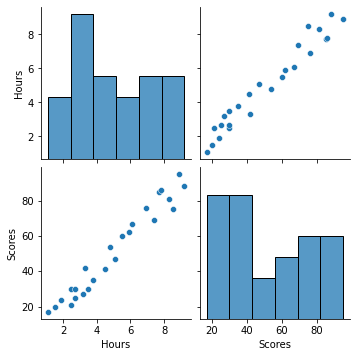

In [10]:
sns.pairplot(data,diag_kind='hist')

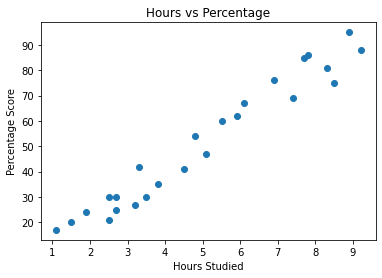

In [11]:
# Plotting the distribution of scores
plt.scatter(data['Hours'], data['Scores'])
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Divide the data into "attributes"and "labels" 

In [12]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**

In [14]:
from sklearn.linear_model import LinearRegression  
linreg = LinearRegression()  

In [15]:
linreg.fit(X_train, y_train) 
print("Training complete.")

Training complete.


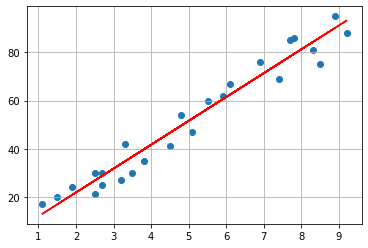

In [16]:
# Plotting the regression line
line = linreg.coef_*X+linreg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,'r');
plt.grid()
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [17]:
# Predicting the scores
y_pred = linreg.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [18]:
print(y_test)

[20 27 69 30 62]


In [19]:
# Testing data - In Hours
print(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [20]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [21]:
# Predicting the score if a Student studies for 9.25 hrs/day
hours = 9.25
pred = linreg.predict([[hours]])
print("If a student studies for 9.25 hours/day,")
print("Predicted Score = {}".format(pred[0]))

If a student studies for 9.25 hours/day,
Predicted Score = 93.69173248737538


### **Evaluating the model**

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Root Square Error:',np.sqrt (metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Mean Root Square Error: 4.6474476121003665


In [23]:
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(y_test,y_pred))

The R-Square of the model is:  0.9454906892105356


### Result :- If a student studies for 9.25 hrs/day, the predicted score will be 93.69